## **IMAGE AUTOENCODER USING CONVOLUTION NEURAL NETWORK ON CIFAR10 DATASET**

In [ ]:
import tensorflow as tf
%load_ext tensorboard
from keras.callbacks import TensorBoard
import keras
from keras import layers
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive

/content/drive/My Drive


In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model

## **LOAD DATASET**

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [ ]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = np.reshape(X_train, (len(X_train), 32, 32, 3)).transpose(0, 1, 2, 3)
X_test = np.reshape(X_test, (len(X_test), 32, 32, 3)).transpose(0, 1, 2, 3)

In [ ]:
# divide x_test into validation and test
X_val = X_test[:7000]
X_test = X_test[7000:]

In [ ]:
print("validation data: {0} \ntest data: {1}".format(X_val.shape, X_test.shape))

validation data: (7000, 32, 32, 3) 
test data: (3000, 32, 32, 3)


## **DEFINE CNN MODEL**

In [ ]:
input_img = keras.Input(shape=(32, 32, 3))

In [ ]:
X = Conv2D(64, (3, 3), padding='same')(input_img)
X = BatchNormalization()(X)
X = Activation('relu')(X)
X = MaxPooling2D((2, 2), padding='same')(X)
X = Conv2D(32, (3, 3), padding='same')(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)
X = MaxPooling2D((2, 2), padding='same')(X)
X = Conv2D(16, (3, 3), padding='same')(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)
encoded = MaxPooling2D((2, 2), padding='same')(X)

X = Conv2D(16, (3, 3), padding='same')(encoded)
X = BatchNormalization()(X)
X = Activation('relu')(X)
X = UpSampling2D((2, 2))(X)
X = Conv2D(32, (3, 3), padding='same')(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)
X = UpSampling2D((2, 2))(X)
X = Conv2D(64, (3, 3), padding='same')(X)
X = BatchNormalization()(X)
X = Activation('relu')(X)
X = UpSampling2D((2, 2))(X)
X = Conv2D(3, (3, 3), padding='same')(X)
X = BatchNormalization()(X)
decoded = Activation('sigmoid')(X)

In [ ]:
md_autoencoder = Model(input_img, decoded)
md_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'mse'])

In [ ]:
# Create a TensorBoard callback
logs = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")

tboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logs,
                                                 histogram_freq = 3,
                                                 profile_batch = '500,520')



In [ ]:
md_autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128   

## **TRAIN MODEL**

In [ ]:
from keras.callbacks import ModelCheckpoint   
import time
# train our model and save the best results in the file: MLP.best_weights
# additionally count the time how long it took

ccn_start = time.time() # for stopwatch

history = md_autoencoder.fit(X_train, X_train,
                epochs=5,
                batch_size=512,
                shuffle=True,
                validation_data=(X_val, X_val),
                callbacks=[tboard_callback])

ccn_end = time.time()
ccn_took = ccn_end -ccn_start

Epoch 1/5
98/98 [==============================] - 359s 4s/step - loss: 0.6367 - accuracy: 0.4738 - mse: 0.0360 - val_loss: 0.6690 - val_accuracy: 0.2711 - val_mse: 0.0516
Epoch 2/5
98/98 [==============================] - 358s 4s/step - loss: 0.5904 - accuracy: 0.5967 - mse: 0.0170 - val_loss: 0.6464 - val_accuracy: 0.3136 - val_mse: 0.0407
Epoch 3/5
98/98 [==============================] - 355s 4s/step - loss: 0.5840 - accuracy: 0.6171 - mse: 0.0145 - val_loss: 0.6200 - val_accuracy: 0.3563 - val_mse: 0.0286
Epoch 4/5
98/98 [==============================] - 355s 4s/step - loss: 0.5801 - accuracy: 0.6410 - mse: 0.0132 - val_loss: 0.5986 - val_accuracy: 0.4662 - val_mse: 0.0196
Epoch 5/5
98/98 [==============================] - 358s 4s/step - loss: 0.5782 - accuracy: 0.6660 - mse: 0.0123 - val_loss: 0.5841 - val_accuracy: 0.6409 - val_mse: 0.0140


In [ ]:
print("took %s seconds"%(ccn_took))

took 1785.5941076278687 seconds


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

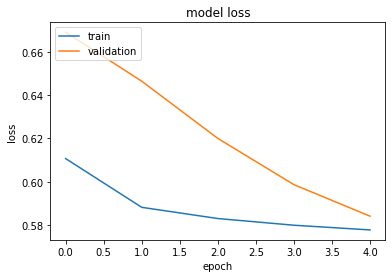

In [ ]:
plotLosses(history)

In [ ]:
score = md_autoencoder.evaluate(X_test, X_test, batch_size=512, verbose=2)

6/6 - 5s - loss: 0.5831 - accuracy: 0.6441 - mse: 0.0138


##**IMAGE RECONSTRUCTION**

In [ ]:
print(md_autoencoder.metrics_names)
print(score)

['loss', 'accuracy', 'mse']
[0.5830977559089661, 0.6440908312797546, 0.013807947747409344]


In [ ]:
ccn_start = time.time() # for stopwatch

decoded_imgs = md_autoencoder.predict(X_test)

ccn_end = time.time()
ccn_took = ccn_end -ccn_start
print("took %s seconds"%(ccn_took))

took 4.9244959354400635 seconds


In [ ]:
print("Cifar10_test: {0}".format(np.average(decoded_imgs)))

Cifar10_test: 0.45221665501594543


In [ ]:
# definition to show original image and reconstructed image
def showOrigDec(orig, dec, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i+1)
        plt.imshow(orig[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i +1 + n)
        plt.imshow(dec[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

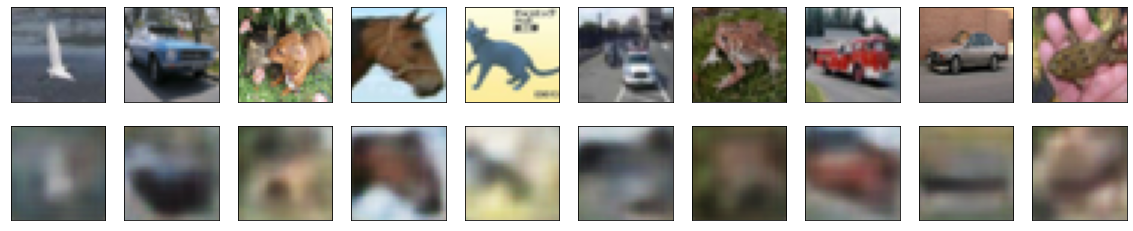

In [ ]:
showOrigDec(X_test, decoded_imgs)

##**MEAN SQUARE ERROR**

In [ ]:
X_test.shape

(3000, 32, 32, 3)

In [ ]:
decoded_imgs.shape

(3000, 32, 32, 3)

In [ ]:
from sklearn.metrics import mean_squared_error

X_test = X_test.reshape(3000,3072)
decoded_imgs = decoded_imgs.reshape(3000,3072)

MSE = mean_squared_error(X_test, decoded_imgs)
MSE

0.013807948